### About dataset
A telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups.  
If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers.  
It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to predict the class of a new customer.  
This solution focuses on using demographic data, such as region, age, and marital status, to predict usage patterns.  
The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service  
For this problem, the classification algorithm **K-nearest-neighbours** will be used.

### Downloading data
The data is stored on the IBM Object storage and will be downloaded.  
The necessary Python libraries Pandas, Numpy, Matplotlib and Scikit-learn will be imported and then the data will be read into a Pandas dataframe.

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
    
df = pd.read_csv('teleCust1000t.csv')
df.head()

--2018-11-13 21:23:44--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

100%[======================================>] 37,048      --.-K/s   in 0.001s  

2018-11-13 21:23:49 (25.2 MB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Data Visualization and Analysis
Let’s see how many customers of each class is in our data set:

In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Apparently, 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers.

Let's see how the income is spread out among our customers:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43d7468fd0>]], dtype=object)

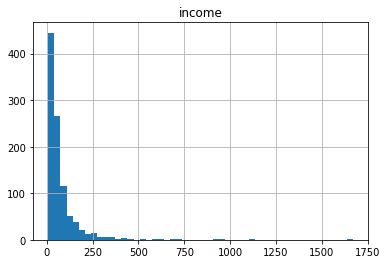

In [7]:
df.hist(column='income', bins=50)

### Feature set
Let's define our Feature Matrix X as a Numpy array and the response vector y.

In [9]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [10]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[   2.,   13.,   44.,    1.,    9.,   64.,    4.,    5.,    0.,
           0.,    2.],
       [   3.,   11.,   33.,    1.,    7.,  136.,    5.,    5.,    0.,
           0.,    6.],
       [   3.,   68.,   52.,    1.,   24.,  116.,    1.,   29.,    0.,
           1.,    2.],
       [   2.,   33.,   33.,    0.,   12.,   33.,    2.,    0.,    0.,
           1.,    1.],
       [   2.,   23.,   30.,    1.,    9.,   30.,    1.,    2.,    0.,
           0.,    4.]])

In [11]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

### Data normalization
Data Standardization gives data zero mean and unit variance. It is especially important for algorithms such as KNN which are based on distance calculations of data points:

In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.  
It is important that our models have a high, out-of-sample accuracy, because the purpose of any model is to make correct predictions on unknown data.  
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.  
Since train_test_split will return 4 different parameters, I will name them: X_train, X_test, y_train, y_test and use the parameters X, y, test_size=0.2, and random_state=4.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Classification
### K-nearest-neighbor
#### Training
Lets start the algorithm with k=4 for now:

In [14]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

#### Predicting
Let's use our model to predict the test set:


In [15]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

### Accuracy evaluation
In multilabel classification, accuracy classification score is a function that computes subset accuracy.   
This function is equal to the jaccard_similarity_score function.  
Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [16]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


### What about other K?
Since our test set accuracy is not very good, let's see whether we can achieve better accuracy with a different k:

In [19]:
Ks = 200
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([ 0.3  ,  0.29 ,  0.315,  0.32 ,  0.315,  0.31 ,  0.335,  0.325,
        0.34 ,  0.33 ,  0.315,  0.34 ,  0.33 ,  0.315,  0.34 ,  0.36 ,
        0.355,  0.35 ,  0.345,  0.335,  0.35 ,  0.36 ,  0.37 ,  0.365,
        0.365,  0.365,  0.35 ,  0.36 ,  0.38 ,  0.385,  0.395,  0.395,
        0.38 ,  0.37 ,  0.365,  0.385,  0.395,  0.41 ,  0.395,  0.395,
        0.395,  0.38 ,  0.39 ,  0.375,  0.365,  0.38 ,  0.375,  0.375,
        0.365,  0.36 ,  0.36 ,  0.365,  0.37 ,  0.38 ,  0.37 ,  0.37 ,
        0.37 ,  0.36 ,  0.35 ,  0.36 ,  0.355,  0.36 ,  0.36 ,  0.36 ,
        0.34 ,  0.34 ,  0.345,  0.35 ,  0.35 ,  0.355,  0.365,  0.355,
        0.355,  0.365,  0.37 ,  0.37 ,  0.37 ,  0.35 ,  0.35 ,  0.35 ,
        0.35 ,  0.36 ,  0.355,  0.33 ,  0.32 ,  0.345,  0.345,  0.345,
        0.335,  0.345,  0.355,  0.345,  0.345,  0.34 ,  0.34 ,  0.335,
        0.345,  0.325,  0.315,  0.31 ,  0.325,  0.32 ,  0.32 ,  0.325,
        0.335,  0.34 ,  0.34 ,  0.335,  0.325,  0.34 ,  0.33 ,  0.325,
      

### Let's plot the model accuracy for different k's of neighbors:

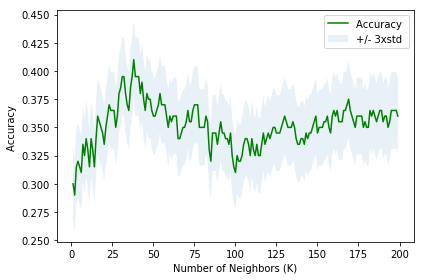

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [23]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.41 with k= 38
